## How ARIMA works

The ARIMA model is used in predictions made on AGT.

From TWS, "<b>the ARIMA model (an acronym for Auto-Regressive Integrated Moving Average), essentially creates a linear equation which describes and forecasts your time series data.</b>"

The equation is generated through three separate parts.

AR — auto-regression: equation terms created based on past data points

I — integration or differencing: accounting for overall “trend” in the data

MA — moving average: equation terms of error or noise based on past data points

### Pre-processing

In [1]:
import pandas as pd

We need to first plot the time series and see its pattern.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   traffic  393 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


<Axes: >

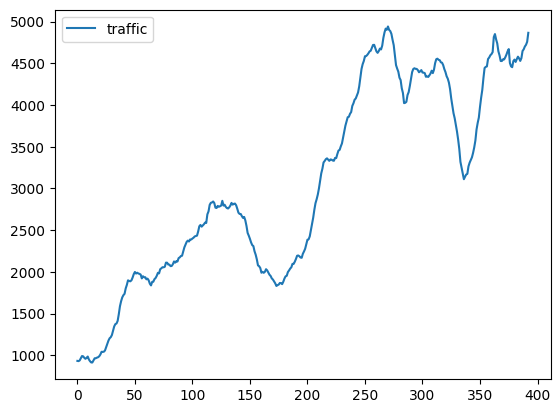

In [3]:
import pandas as pd
df = pd.read_csv('website_data.csv')
df.info()

df.plot()

In this case, the time series' variance does not look constant throughout time. Therefore we must transform the series to stabilize its variance. Taking the Logarithm can accomplish this.

<Axes: >

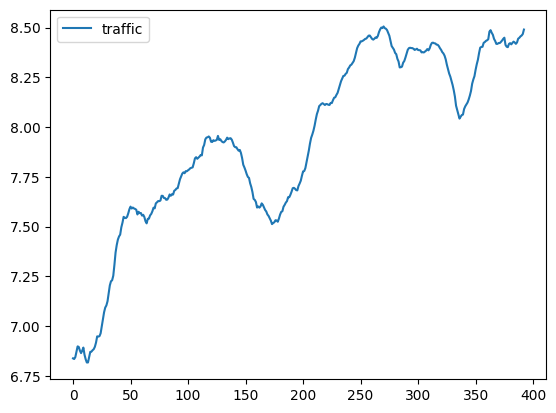

In [7]:
import numpy as npnumpy 
df = np.log(df)
df.plot()

The plot is now less variant accross time.

We are able to now split the data into training and test sets.

In [11]:
msk = (df.index < len(df)-30)
df_train = df[msk].copy()
df_test = df[~msk].copy()

### Checking for stationarity of time series

The ARIMA model is usually applied on stationary time series data. We must check whether our time series has its statistical properties staying approximately the same throughout time.

There are different ways of checking whether the time series is stationary.

### Method 1

Time Series Plot

If a time series plot graph has a strong upward trend, it is <b>non-stationary</b>.

### Method 2

ACF plot and PACF plot

The ACF (<b>A</b>uto<b>C</b>orrelation <b>F</b>unction)

Measures the linear relationship between lagged values of the time series.

ex. yt and yt-k for different values of k

How relationships are handled in ACF is based on their correlations to one another. For example, we can assume that yt and yt-1 are correlated, and yt-1 and yt-2 are also correlated. Since this is true, their correlations with yt-1, yt and yt-2 must also be correlated.

Is there information to predict yt in yt-2 besides their relationships with yt-1? Yes.

Another definition called partial autocorrelations shows the partial correlation of the time series with its lags, after removing the effects of lower-order lags between them. 